# Overskrift

<ul>
<li>Rense data
<li>Display data
<li>Kanskje finne noen pakker som støtter adx og de der?
<li>Sette indikatorverktøy i egne py filer


In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import stockstats

from lib.rens import rens
from lib.god_runde import positiv_utvikling

In [4]:
def hent_indikatortall(data, gode):
    stock = stockstats.StockDataFrame.retype(data)
    stock['rsi_12']
    stock['trix']
    stock['adx']
    stock['kdjk']
    
    rsi = []
    trix = []
    adxr = []
    kdjk = []
    for ix, fin in gode.iterrows():
        oppgang = stock[int(fin.start):int(fin.endex)]
        rsi.append(oppgang.rsi_12.values)
        trix.append(oppgang.trix.values)
        adxr.append(oppgang.adxr.values)
        kdjk.append(oppgang.kdjk.values)
        
    
    return rsi, trix, adxr, kdjk      

In [43]:
def multi_analyse(filer):
    alle_gode = pd.DataFrame(columns=['start', 'endex', 'start_pris', 'slutt_pris', 'oppgang', 'score',
                                      'rsi', 'trix', 'adxr', 'kdjk'])
    for fil in filer:
        data = cleanup.clean_data(pd.read_excel(fil))
        gode = pos_ut.calculate(data)
        rsi, trix, adxr, kdjk = hent_indikatortall(data, gode)
        gode['rsi'] = rsi
        gode['trix'] = trix
        gode['adxr'] = adxr
        gode['kdjk'] = kdjk
        
        alle_gode = alle_gode.append(gode, ignore_index=True)
               
    return alle_gode

In [35]:
cleanup = rens()
pos_ut = positiv_utvikling()

In [55]:
filer = ['data/Aker 02.04.2020.xlsx', 'data/Equinor 20.08.2020.xlsx', 'data/Norsk Hydro 20.08.2020.xlsx',
        'data/Aker 30.04.2020.xlsx', 'data/DNB 20.08.2020.xlsx', 'data/Equinor 24.04.2020.xlsx',
        'data/Gjensidige Forsikring 27.04.2020.xlsx', 'data/Mowi 27.04.2020.xlsx', 'data/Norsk Hydro 27.04.2020.xlsx']
data = multi_analyse(filer)
data

C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,start,endex,start_pris,slutt_pris,oppgang,score,rsi,trix,adxr,kdjk
0,128,186,240.20,247.8,3.164030,50.703007,"[29.08667618110441, 29.086676181104394, 38.508...","[-0.04397465516493707, -0.045443866319610726, ...","[30.19964066608519, 33.407059607068106, 33.916...","[10.330356638278655, 6.886904425519103, 21.257..."
1,229,267,245.80,249.6,1.545972,31.951273,"[53.226517486104214, 48.34750785504549, 48.347...","[-0.010354636272359287, -0.009138505674278392,...","[15.09565910714205, 13.631975273648532, 11.912...","[56.62048569675035, 57.74699046450004, 58.4979..."
2,82,145,142.25,143.6,0.949033,34.416375,"[39.628459413533605, 39.62845941353359, 36.532...","[-0.01331474143004796, -0.01329098840474391, -...","[43.988744069076645, 40.686785274370564, 37.73...","[21.868315695410324, 31.24554379694021, 34.163..."
3,58,106,267.80,272.6,1.792382,36.304068,"[41.78270395470082, 40.892106268959026, 39.962...","[-0.10058224660774777, -0.0966240136151853, -0...","[30.14799872260209, 27.36654789275933, 24.8790...","[31.86117198134676, 40.28840036851708, 52.7848..."
4,118,159,270.40,273.6,1.183432,30.083060,"[45.73450951161533, 48.60760072246316, 56.1974...","[-0.004073298420161102, -0.006143478019842823,...","[24.207935443619647, 21.939106323799766, 21.02...","[25.604326110013336, 50.40288407334222, 66.935..."
5,93,155,130.80,133.1,1.758410,37.900690,"[34.49676812958434, 42.5348256275501, 47.24313...","[-0.025356804088786506, -0.02461829753130863, ...","[30.609479337412704, 28.513118996801097, 25.80...","[6.430135696708572, 24.286757131136014, 49.524..."
6,215,253,133.15,135.0,1.389410,24.040310,"[38.217236428599485, 50.80710475499549, 53.397...","[0.009615022864393365, 0.007326840449764252, 0...","[16.838697695499906, 15.773456304606642, 14.58...","[19.201878271343723, 37.04367642332115, 58.029..."
7,83,155,169.85,171.7,1.089196,42.539408,"[46.40372445195215, 46.40372445195215, 51.8602...","[0.0025794556958545593, 0.001689892459159638, ...","[21.520283403929696, 20.476594072304053, 19.09...","[14.404693310930954, 19.126938397763105, 31.79..."


In [87]:
linjer = [dict(type='line', yref='paper', y0=0,y1=1, xref='x',x0=info.start, x1=info.start,
                    line=dict(color="Green"))
                for j,info in gode.iterrows()]
linjer_slutt =  [dict(type='line', yref='paper', y0=0,y1=1, xref='x',x0=info.endex, x1=info.endex,
                      line=dict(color="Red"))
                 for j,info in gode.iterrows()]
linjer.extend(linjer_slutt)

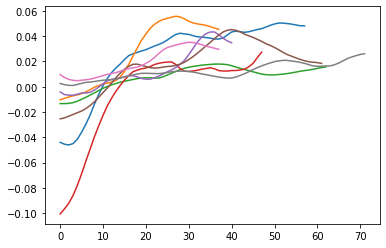

In [66]:
fig = plt.figure
for i in data.trix:
    plt.plot(i)
plt.savefig('images/trixplot')

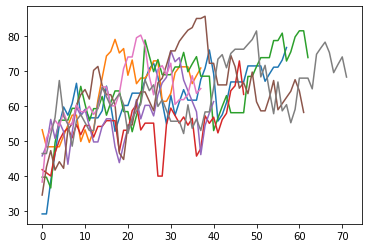

In [67]:
fig = plt.figure
for i in data.rsi:
    plt.plot(i)
plt.savefig('images/rsiplot')

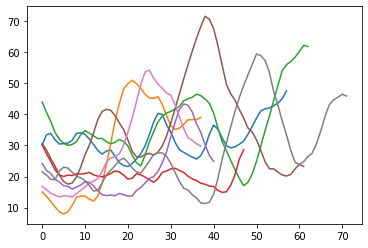

In [68]:
fig = plt.figure
for i in data.adxr:
    plt.plot(i)
plt.savefig('images/adxrplot')

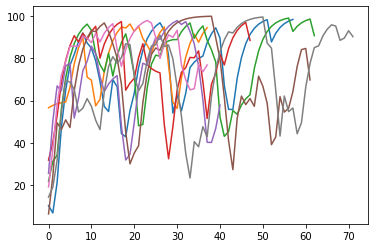

In [69]:
fig = plt.figure
for i in data.kdjk:
    plt.plot(i)
plt.savefig('images/kdjkplot')